In [35]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
from keras import regularizers


## load in MNIST data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Each image is a 28*28 matrix (784 when squished)
x_train[0].shape

(28, 28)

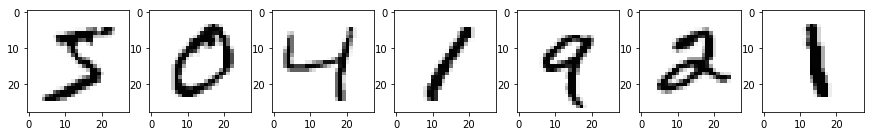

In [4]:
# plot some of the images 
fig, ax = plt.subplots(1,7, figsize=(15,15))
ax[0].imshow(x_train[0], cmap=mpl.cm.Greys)
ax[1].imshow(x_train[1], cmap=mpl.cm.Greys)
ax[2].imshow(x_train[2], cmap=mpl.cm.Greys)
ax[3].imshow(x_train[3], cmap=mpl.cm.Greys)
ax[4].imshow(x_train[4], cmap=mpl.cm.Greys)
ax[5].imshow(x_train[5], cmap=mpl.cm.Greys)
ax[6].imshow(x_train[6], cmap=mpl.cm.Greys)

In [5]:
# reshape data for modeling
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# use x_train.reshape((28,28)) to return it to its former format

((60000, 784), (60000,), (10000, 784), (10000,))

## Run PCA to reduce the dimensionality of the data

In [6]:
# PCA is effected by scale so you need to scale the features in the data before applying PCA.
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_train)
# Apply transform to both the training set and the test set.
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

c:\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
# Select all components
pca_all = PCA(n_components=784)
pca_all.fit(x_train)
eigenvalues_all = pca_all.explained_variance_

# The top 50 components will be selected:
pca_50 = PCA(n_components=50)
pca_50.fit(x_train)
eigenvalues_50 = pca_50.explained_variance_

# The top 25 components will be selected:
pca_25 = PCA(n_components=25)
pca_25.fit(x_train)
eigenvalues_25 = pca_25.explained_variance_


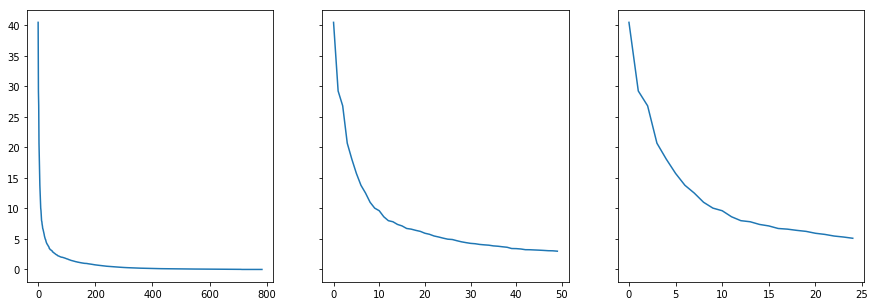

In [8]:
fig, ax = plt.subplots(1,3, figsize=(15,5), sharey=True)

ax[0].plot(range(784), eigenvalues_all)
ax[1].plot(range(50), eigenvalues_50)
ax[2].plot(range(25), eigenvalues_25)


In [9]:
# dot product of eigenvectors and original data
x_train_pca_all = pca_all.transform(x_train) 
x_test_pca_all = pca_all.transform(x_test)

x_train_pca_50 = pca_50.transform(x_train) 
x_test_pca_50 = pca_50.transform(x_test)

x_train_pca = pca_25.transform(x_train) 
x_test_pca = pca_25.transform(x_test)

In [10]:
# explained variance show much information (variance) that can be attributed to each of the principal components.
pca_25.explained_variance_ratio_

array([0.05646717, 0.04078272, 0.0373938 , 0.02885115, 0.02521109,
       0.0219427 , 0.01923344, 0.01745799, 0.01535092, 0.01401718,
       0.0134174 , 0.01203735, 0.01114563, 0.01089885, 0.01028601,
       0.00994312, 0.00936187, 0.00920922, 0.00893053, 0.00869746,
       0.00826619, 0.00800928, 0.00763423, 0.00740956, 0.00712672])

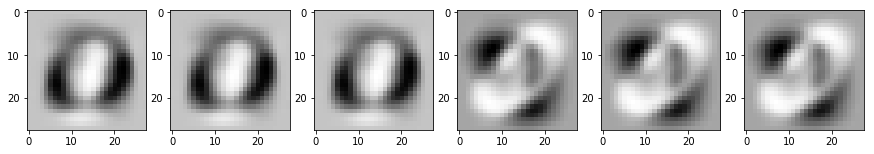

In [11]:
# visualize the images for all three PCAs (should be 3 5s and 3 0s)
fig, ax = plt.subplots(1,6, figsize=(15,15))

r_image = pca_all.components_[0].reshape((28,28))
r2_image = pca_50.components_[0].reshape((28,28))
r3_image = pca_25.components_[0].reshape((28,28))


r4_image = pca_all.components_[1].reshape((28,28))
r5_image = pca_50.components_[1].reshape((28,28))
r6_image = pca_25.components_[1].reshape((28,28))


ax[0].imshow(r_image, cmap=mpl.cm.Greys)
ax[1].imshow(r2_image, cmap=mpl.cm.Greys)
ax[2].imshow(r3_image, cmap=mpl.cm.Greys)
ax[3].imshow(r4_image, cmap=mpl.cm.Greys)
ax[4].imshow(r5_image, cmap=mpl.cm.Greys)
ax[5].imshow(r6_image, cmap=mpl.cm.Greys)

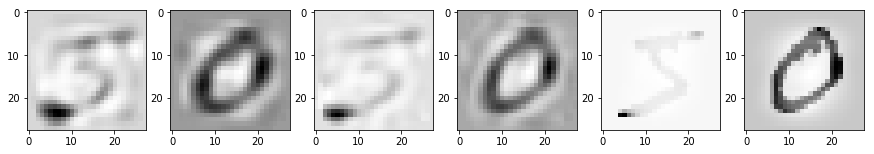

In [28]:
# reconstruct the images from the transformed data (should be 3 5s and 3 0s)

fig, ax = plt.subplots(1, 6, figsize=(15,15))


inv_pca = pca_25.inverse_transform(x_train_pca)
r7_image = inv_pca[0].reshape((28,28))
r8_image = inv_pca[1].reshape((28,28))

inv_pca_50 = pca_50.inverse_transform(x_train_pca_50)
r9_image = inv_pca_50[0].reshape((28,28))
r10_image = inv_pca_50[1].reshape((28,28))

inv_pca_all = pca_all.inverse_transform(x_train_pca_all)
r11_image = inv_pca_all[0].reshape((28,28))
r12_image = inv_pca_all[1].reshape((28,28))


ax[0].imshow(r7_image, cmap=mpl.cm.Greys)
ax[1].imshow(r8_image, cmap=mpl.cm.Greys)
ax[2].imshow(r9_image, cmap=mpl.cm.Greys)

ax[3].imshow(r10_image, cmap=mpl.cm.Greys)
ax[4].imshow(r11_image, cmap=mpl.cm.Greys)
ax[5].imshow(r12_image, cmap=mpl.cm.Greys)

## Apply Models to the Transformed Data

### Logistic Regression

In [29]:
# apply logistic regression
logreg = LogisticRegression(random_state = 42)

param_grid = {'C': [100, 1000],  # regularization parameter
              'penalty': ['l1', 'l2'],  # regularization penalty
             }
logreg_grid = GridSearchCV(logreg,
                           param_grid,
                           cv=5,
                           verbose=0)

logreg_grid.fit(x_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
results = logreg_grid.grid_scores_
for result in results:
    print(result)
print("\nBest Train score: %0.4f" % logreg_grid.best_score_)
print("Best Test score:%0.4f\n" % logreg_grid.score(x_test_pca, y_test))
print ("---------best parameters---------")
best_parameters = logreg_grid.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print ("%s: %r" % (param_name, best_parameters[param_name])) 

mean: 0.86360, std: 0.00764, params: {'C': 100, 'penalty': 'l1'}
mean: 0.86360, std: 0.00764, params: {'C': 100, 'penalty': 'l2'}
mean: 0.86360, std: 0.00764, params: {'C': 1000, 'penalty': 'l1'}
mean: 0.86360, std: 0.00764, params: {'C': 1000, 'penalty': 'l2'}

Best Train score: 0.8636
Best Test score:0.8681

---------best parameters---------
C: 100
penalty: 'l1'


c:\python\python36\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [31]:
# sample predict
print(logreg_grid.predict(x_test_pca[0].reshape(1,-1)), y_test[0])

[7] 7


### Random Forest

In [133]:
RF = RandomForestClassifier(random_state = 42)

param_grid = {'n_estimators': [20, 200],
               'max_depth': [8,10,12],
               'min_samples_split': [5, 10],
               'min_samples_leaf': [2, 4]
             }
RF_grid = GridSearchCV(RF 
                    , param_grid = param_grid
                    , n_jobs = -1
                   )
RF_grid.fit(x_train_pca, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [20, 200], 'max_depth': [8, 10, 12], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [134]:
results = RF_grid.grid_scores_
for result in results:
    print(result)
print("\nBest Train score: %0.4f" % RF_grid.best_score_)
print("Best Test score:%0.4f\n" % RF_grid.score(x_test_pca, y_test))
print ("---------best parameters---------")
best_parameters = RF_grid.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print ("%s: %r" % (param_name, best_parameters[param_name])) 

c:\python\python36\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


mean: 0.86525, std: 0.00410, params: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20}
mean: 0.87863, std: 0.00447, params: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
mean: 0.86300, std: 0.00410, params: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 20}
mean: 0.87690, std: 0.00460, params: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
mean: 0.86275, std: 0.00323, params: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 20}
mean: 0.87700, std: 0.00429, params: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
mean: 0.86067, std: 0.00438, params: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 20}
mean: 0.87620, std: 0.00492, params: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
mean: 0.89152, std: 0.00

### Support Vector Machines

In [137]:
SVM = svm.SVC(random_state = 42) 

param_grid = {'C': [10, 1.0, 0.1],
              'kernel':['linear', 'rbf']
             }
SVM_grid = GridSearchCV(SVM,
                        param_grid = param_grid,
                        scoring = 'accuracy',
                        n_jobs = -1,
                        cv=None
                       )

SVM_grid.fit(x_train_pca, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [10, 1.0, 0.1], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [139]:
results = SVM_grid.grid_scores_
for result in results:
    print(result)
print("\nBest Train score: %0.4f" % SVM_grid.best_score_)
print("Best Test score: %0.4f\n" % SVM_grid.score(x_test_pca, y_test))
print ("---------best parameters---------")
best_parameters = SVM_grid.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print ("%s: %r" % (param_name, best_parameters[param_name])) 

c:\python\python36\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


mean: 0.90890, std: 0.00188, params: {'C': 10, 'kernel': 'linear'}
mean: 0.86483, std: 0.00606, params: {'C': 10, 'kernel': 'rbf'}
mean: 0.90883, std: 0.00174, params: {'C': 1.0, 'kernel': 'linear'}
mean: 0.85465, std: 0.00547, params: {'C': 1.0, 'kernel': 'rbf'}
mean: 0.90887, std: 0.00190, params: {'C': 0.1, 'kernel': 'linear'}
mean: 0.59387, std: 0.00743, params: {'C': 0.1, 'kernel': 'rbf'}

Best Train score: 0.9089
Best Test score: 0.9137

---------best parameters---------
C: 10
kernel: 'linear'


### Neural Networks - Multi-Layer Perceptron Classifier model

In [174]:
# set hidden_layer_sizes with a tuple consisting of the number of neurons you want at each layer, where the nth entry in the tuple represents 
# the number of neurons in the nth layer of the MLP model, e.g. 3 layers with 25 neurons (== number of features)
mlp = MLPClassifier(hidden_layer_sizes=(25,25,25), max_iter = 1000, random_state = 42) 
mlp.fit(x_train_pca, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25, 25, 25), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [175]:
predictions = mlp.predict(x_test_pca)
print("train score:", mlp.score(x_train_pca, y_train)) 
print("test score:", mlp.score(x_test_pca, y_test)) 
print(confusion_matrix(y_test, predictions))
# same result with 500 vs 1000 max_iter

train score: 0.9704666666666667
test score: 0.9552
[[ 960    0    3    1    2    2    4    1    6    1]
 [   0 1119    2    2    0    1    4    2    5    0]
 [   6    4  980    7    4    0    4    9   16    2]
 [   0    0    7  958    0    9    0   13   18    5]
 [   0    1    7    0  940    1    8    6    3   16]
 [   3    0    0   26    1  835    7    2   16    2]
 [   7    4    1    1    7   12  921    2    3    0]
 [   2    3   11    1    5    0    0  984    4   18]
 [   5    0    7   20    5   14    2    5  914    2]
 [   5    4    0    7   17    7    1   17   10  941]]


In [176]:
print(mlp.predict(x_test_pca[:35]),"\n", y_test[:35])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 8 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7] 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7]


### Neural Network - Sequential from Keras

In [32]:
# create dummies for output
y_test_dummies = pd.DataFrame(y_test)
y_test_dummies = pd.get_dummies(y_test_dummies.loc[:,0])
y_train_dummies = pd.DataFrame(y_train)
y_train_dummies = pd.get_dummies(y_train_dummies.loc[:,0])

In [33]:
x_train.shape

(60000, 784)

In [48]:
model = Sequential([
    Dense(512, input_shape=(25,), kernel_regularizer=regularizers.l2(0.01)),  #10 digits
    Activation('elu'), 
    Dense(256, kernel_regularizer=regularizers.l2(0.01)),  # second layer
    Activation('elu'),
    Dense(128, kernel_regularizer=regularizers.l2(0.01)),  # second layer
    Activation('elu'),
    Dense(10),
    Activation('softmax')  # 10 dummy values for each number--> use 'softmax'
])

# note: if we had softmax in our hidden layers + cross-entropy loss function, the NN would function exactly like a logistics regression in the 
# hidden units, and all the parameters would be estimated by maximum likelihood.
model.compile(loss = categorical_crossentropy, optimizer=Adadelta(), metrics=['accuracy'])

history = model.fit(x_train_pca, y_train_dummies, validation_split = 0.33, epochs=30, batch_size=512, verbose = 0)


In [49]:
preds = model.predict_classes(x_test_pca, verbose=0)
score_test = model.evaluate(x_test_pca, y_test_dummies, batch_size = 512)
score_train = model.evaluate(x_train_pca, y_train_dummies, batch_size = 512)

60000/60000 [==============================] - 1s 14us/step


In [50]:
print("Test Score: ", score_test, "Train Score: ", score_train) 
# relu: 35 epochs: 97.24 test, 99.97 train; 25 epochs: 97.03 test, 98.69 train
#                                      elu: 25 epochs: 96.41 test, 97.68 train

Test Score:  [0.3508130168437958, 0.9410000003814697] Train Score:  [0.3525863605817159, 0.9399000000317892]


In [51]:
print(preds[:35],"\n", y_test[:35])

[7 2 1 0 4 1 4 4 8 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 6 7] 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7]


In [52]:
print(confusion_matrix(y_test, preds))

[[ 964    0    2    2    0    4    3    1    4    0]
 [   0 1122    4    2    1    1    3    0    2    0]
 [   7    3  988   11    3    0    1    9    9    1]
 [   0    6   12  951    1   16    0    9   11    4]
 [   1    1    9    0  928    1    9    1    3   29]
 [   6    1    2   16    2  837    6    1   14    7]
 [  18    4    4    1    8    9  906    0    8    0]
 [   1   22   20    5    4    0    0  921    0   55]
 [   8    3   12   29    8   22    5    4  868   15]
 [   6   11    0   13   28    5    1   12    8  925]]


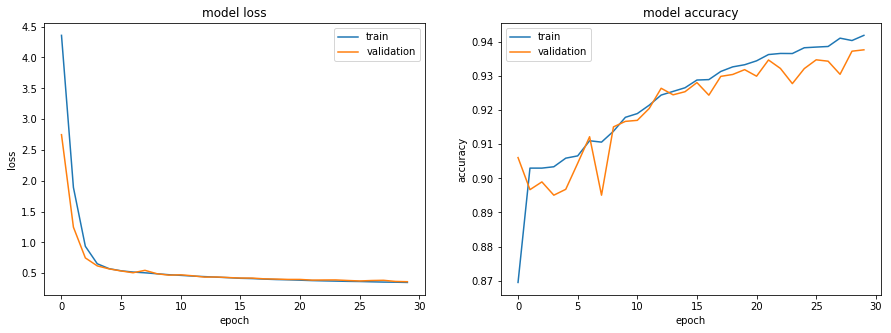

In [53]:
# summarize history for loss
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('model loss')
ax[0].set_ylabel('loss')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'validation'], loc='upper right')
ax[1].plot(history.history['acc'])
ax[1].plot(history.history['val_acc'])
ax[1].set_title('model accuracy')
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'validation'], loc='upper left')